In [40]:
#Analyse bivariée avec R et PYTHON CHECKPOINT

#Objectif
#Nous continuerons le travail sur le même jeu de données du point de contrôle précédent, 
#mais nous irons plus loin et étudierons la relation entre average_montly_hours et number_project.

#Des instructions
#1.Charger le jeu de données
#2.Calculer le coefficient de corrélation avec R et python et en déduire sa valeur
#3.Dans la deuxième étape, nous allons implémenter une régression linéaire 
#  d'heures_mensuelles_moyennes = a*nombre_projet+b
#4.En déduire l'expression finale de notre régression
#N'oubliez pas d'implémenter votre travail avec R et python

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('HR_comma_sep.csv',sep=",")

In [43]:
df2 = df.copy()

In [44]:
df2.shape

(14999, 10)

In [45]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [47]:
# Valeurs Manquantes par colonnes
df2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [48]:
#Calculer le coefficient de corrélation avec R et python et en déduire sa valeur
x = df2['number_project']
y = df2 ['average_montly_hours']
R = np.corrcoef(x, y)
R

array([[1.        , 0.41721063],
       [0.41721063, 1.        ]])

In [49]:
# Aperçu de la corrélations entre les variables ('number_project','average_montly_hours')
#plt.figure(figsize=(12, 8))
#sns.heatmap(df2.corr(), annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'})
#plt.show()

<AxesSubplot:>

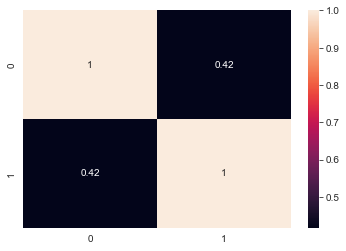

In [50]:
x = df2['number_project']
y = df2 ['average_montly_hours']
sns.heatmap(data=np.corrcoef(x,y), annot=True)

In [51]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [52]:
# Suppression des colonnes jugés inutiles
df2 = df2.drop(['satisfaction_level', 'last_evaluation','time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'], axis=1)
df2.head(2)

,number_project,average_montly_hours
0,2,157
1,5,262


# REGRESSION LINEAIRE

In [53]:
from sklearn.linear_model import LinearRegression

#données
x= np.array(df2['number_project']).reshape(-1, 1)
y = np.array(df2['average_montly_hours'])

model = LinearRegression().fit(x, y) 
r_sq = model.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coef:', model.coef_)

coefficient of determination: 0.17406471345793328
intercept: 136.76027693974652
coef: [16.90485267]
